In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.stats import chi2_contingency
sns.set(palette="muted", color_codes=True)

In [2]:
df = pd.read_csv(".\数据集\TrainingData.csv", header=0)
##删除类别变量缺失值所在行
A=df.select_dtypes(include='object').isnull().sum()[df.select_dtypes(include='object').isnull().sum()>0]
df.dropna(axis=0,subset = A.index,inplace = True)
##修改数值型变量Personal_info5的结果
df.loc[df['Personal_info5'].notnull(),'Personal_info5']=1
df.loc[:,'Personal_info5'].fillna(0,inplace=True)
##删除数值型4个变量-1所在行
cond=(df.Coverage_info1!=-1)&(df.Property_info5!=-1)&(df.Geographic_info1!=-1)&(df.Geographic_info2!=-1)
df1=df[cond]
##删除数值型变量Geographic_info3列
df1.drop('Geographic_info3', axis = 1, inplace = True)
##修改数值型变量Personal_info2中-1的值为0
df1.loc[df1['Personal_info2']==-1,'Personal_info2']=0

C:\Users\17630\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\17630\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [3]:
print((df1==-1).sum())
print('----------------------')
print(df1.isnull().sum())

Quote_Id            0
Quote_Date          0
Quote_Flag          0
Field_info1         0
Field_info2         0
Field_info3         0
Field_info4         0
Coverage_info1      0
Coverage_info2      0
Coverage_info3      0
Sales_info1         0
Sales_info2         0
Sales_info3         0
Sales_info4         0
Sales_info5         0
Personal_info1      0
Personal_info2      0
Personal_info3      0
Personal_info4      0
Personal_info5      0
Property_info1      0
Property_info2      0
Property_info3      0
Property_info4      0
Property_info5      0
Geographic_info1    0
Geographic_info2    0
Geographic_info4    0
Geographic_info5    0
dtype: int64
----------------------
Quote_Id            0
Quote_Date          0
Quote_Flag          0
Field_info1         0
Field_info2         0
Field_info3         0
Field_info4         0
Coverage_info1      0
Coverage_info2      0
Coverage_info3      0
Sales_info1         0
Sales_info2         0
Sales_info3         0
Sales_info4         0
Sales_info5       

In [5]:
#变量预测变量Y分离，同时去除不进入模型的变量
Y=df1['Quote_Flag']
Quote_Id=df1['Quote_Id']
Quote_Date=df1['Quote_Date']
dfx=df1.drop(['Quote_Flag','Quote_Id','Quote_Date'], axis = 1)
dfx.head()

,Field_info1,Field_info2,Field_info3,Field_info4,Coverage_info1,Coverage_info2,Coverage_info3,Sales_info1,Sales_info2,Sales_info3,...,Personal_info5,Property_info1,Property_info2,Property_info3,Property_info4,Property_info5,Geographic_info1,Geographic_info2,Geographic_info4,Geographic_info5
0,B,0.9153,935,N,5,2,D,1,5,11,...,1.0,N,0,D,1,6,2,13,N,CA
1,J,0.9691,"1,165",N,5,22,F,1,5,1,...,0.0,N,0,D,1,8,14,7,N,TX
2,B,0.9153,935,N,6,22,D,1,5,11,...,1.0,N,0,D,1,11,2,12,N,CA
3,J,0.8793,"1,113",N,1,22,F,1,5,11,...,1.0,N,0,O,0,1,14,6,N,TX
4,F,1.0101,548,N,13,22,E,1,3,20,...,0.0,N,0,R,1,25,4,22,N,NJ


In [6]:
#数值型变量与类别型变量分离
dfnum=dfx.select_dtypes(include=['int64','float']).copy()
dfcate=dfx.select_dtypes(include=['object']).copy()
print(dfnum.shape)
print(dfcate.shape)

(62458, 15)
(62458, 11)


In [9]:
#划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfnum,Y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)
print(X_train.shape)
print(X_test.shape)

(43720, 15)
(18738, 15)


In [10]:
y_train.value_counts()

0    35349
1     8371
Name: Quote_Flag, dtype: int64

In [7]:
#LogisticRegression算法
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, class_weight = 'balanced')
LR.fit(X_train,y_train)
#查看训练集结果
print(LR.score(X_train,y_train))
#查看验证集结果
print(LR.score(X_test,y_test))

0.6766468435498627
0.6776603693030206


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
#计算混淆函数
from sklearn.metrics import confusion_matrix
Y_pred_test = LR.predict(X_test)
confusion_matrix(y_test,Y_pred_test)

array([[10173,  4981],
       [ 1059,  2525]], dtype=int64)

In [9]:
#计算精准率
from sklearn.metrics import precision_score
precision_score(y_test,Y_pred_test)

0.33639754862776444

In [10]:
#计算召回率
from sklearn.metrics import recall_score
recall_score(y_test,Y_pred_test)

0.7045200892857143

In [11]:
#计算f1得分
from sklearn.metrics import f1_score
f1_score(y_test,Y_pred_test)

0.45536519386834984

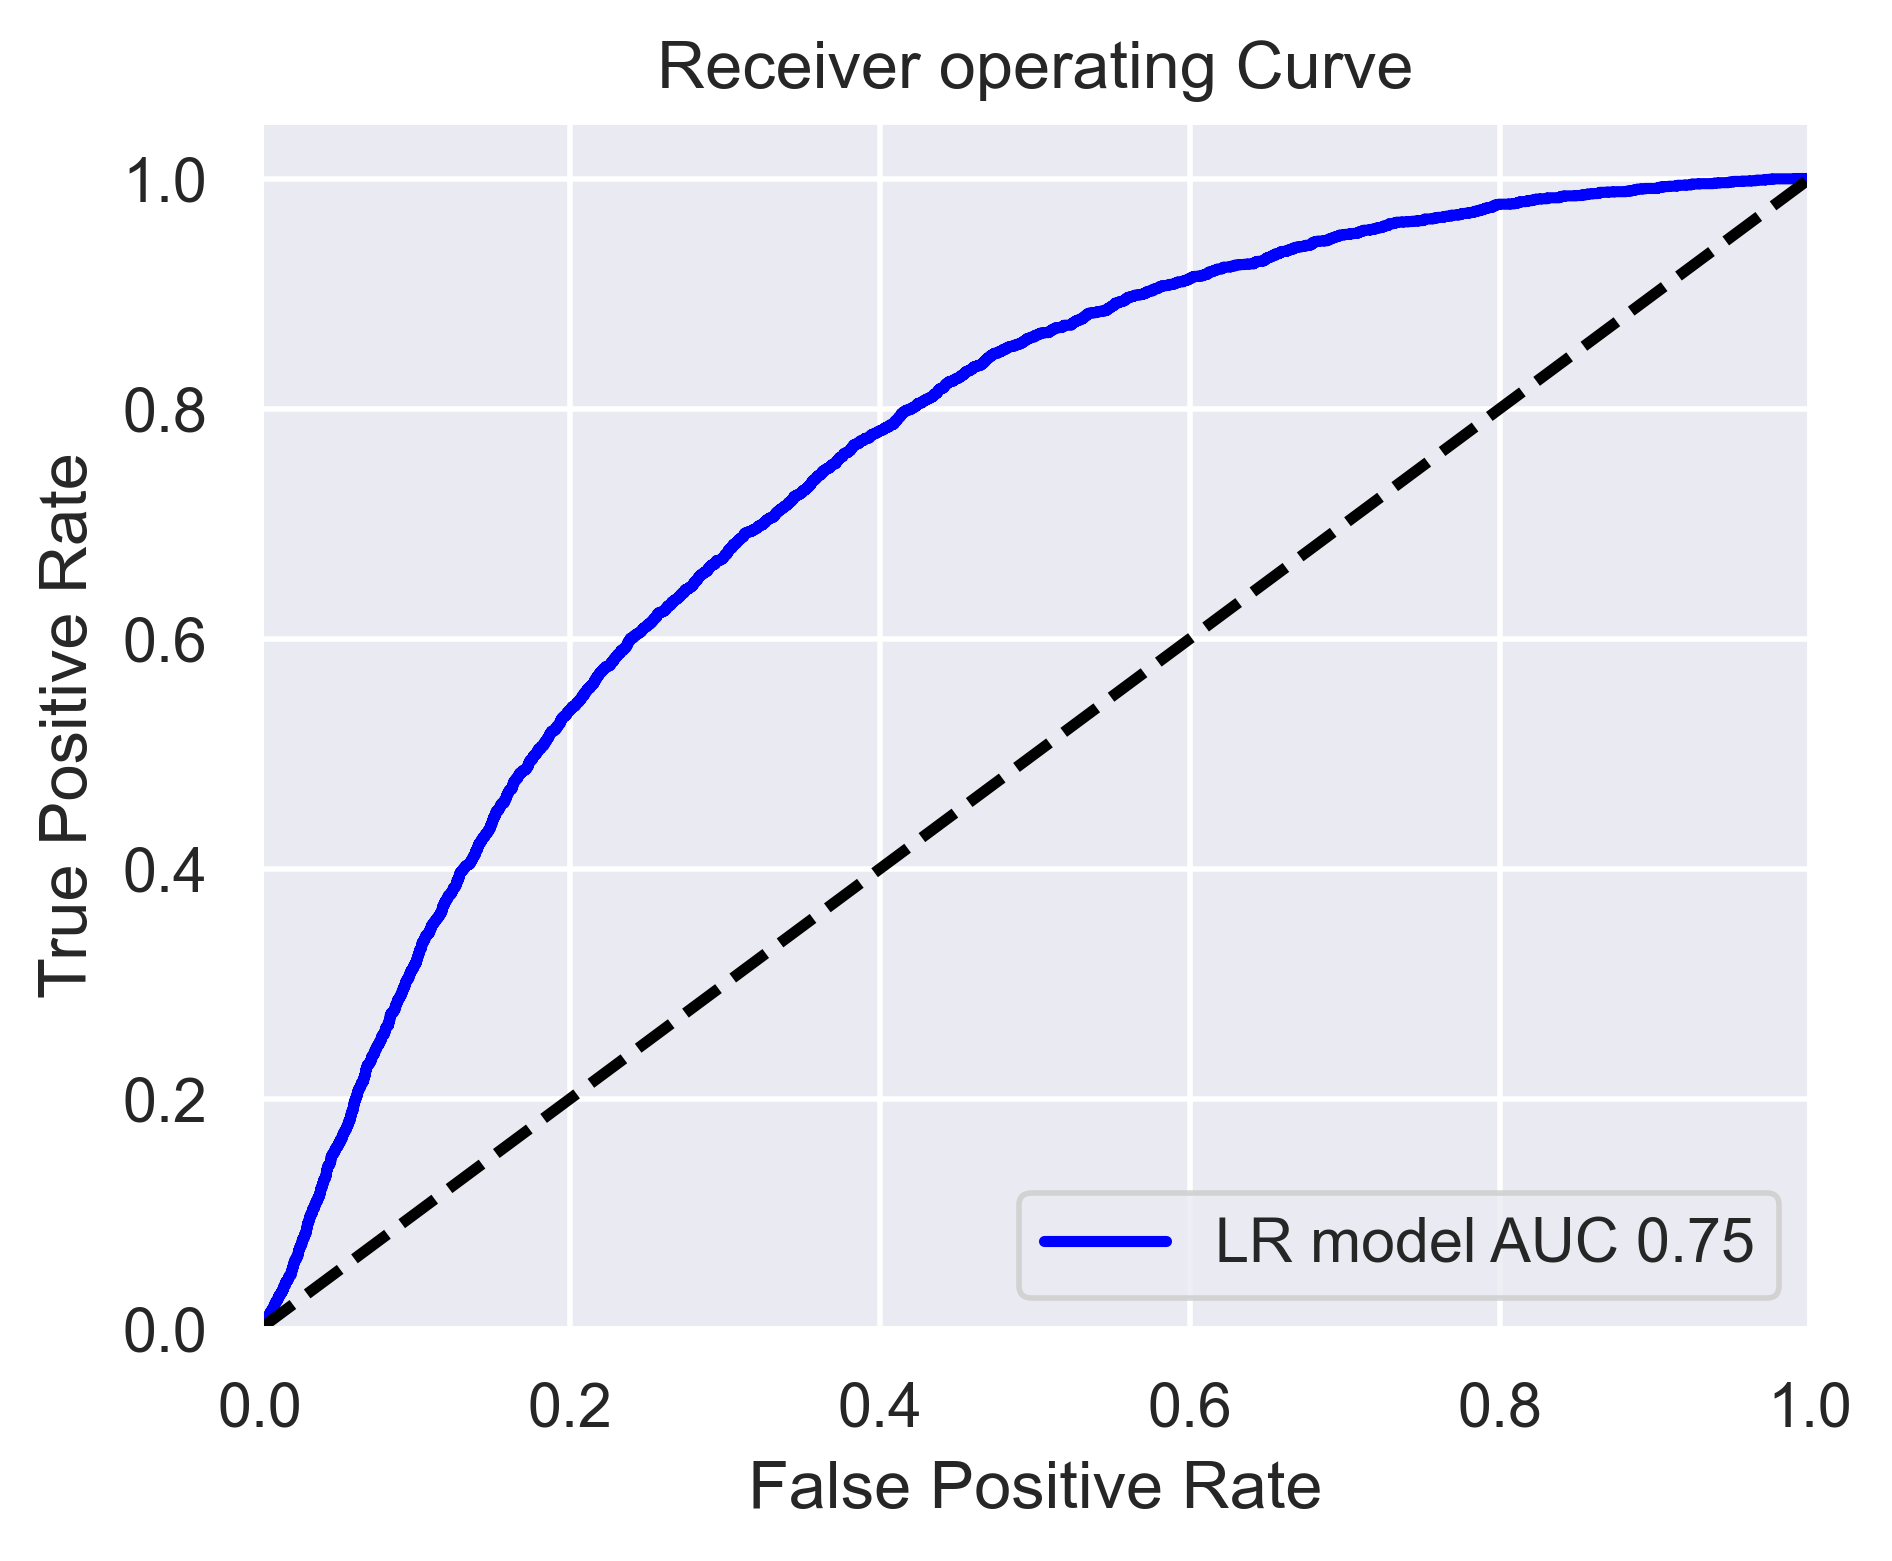

In [12]:
#绘制ROC曲线，计算AUC数值
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
decision_scores = LR.decision_function(X_test)
fprs, tprs, thresholds = roc_curve(y_test, decision_scores)
auc = roc_auc_score(y_test, decision_scores)
plt.figure(dpi=400,figsize=(5,4))
plt.plot(fprs,tprs,label='LR model AUC %0.2f' % auc, color='blue', lw = 2)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating Curve')
plt.legend(loc="lower right")
plt.show()

In [13]:
#支持向量机算法
from sklearn.svm import SVC
C=1
#linear核函数
linear_model = SVC(kernel='linear',C = C,max_iter=1000).fit(X_train,y_train)
#查看训练集结果
print('linear_model train',linear_model.score(X_train,y_train))
#查看验证集结果
print('linear_model test',linear_model.score(X_test,y_test))
#rbf核函数
rbf_model = SVC(kernel='rbf',C = C,max_iter=1000).fit(X_train,y_train)
#查看训练集结果
print('rbf_model train',rbf_model.score(X_train,y_train))
#查看验证集结果
print('rbf_model test',rbf_model.score(X_test,y_test))

D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


linear_model train 0.3747483989021043
linear_model test 0.377788451275483


D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


rbf_model train 0.3134949679780421
rbf_model test 0.3143878749066069


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR: score:0.677660 (precision:0.336398,recall:0.704520)
KNN: score:0.766624 (precision:0.260182,recall:0.119420)
GB: score:0.847316 (precision:0.638135,recall:0.465960)
ABC: score:0.840324 (precision:0.600955,recall:0.491629)
RF: score:0.852919 (precision:0.668980,recall:0.457310)


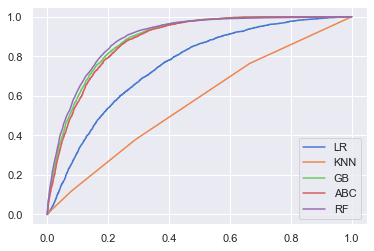

  names    scores  precisions   recalls       f1s      aucs
0    LR  0.677660    0.336398  0.704520  0.455365  0.687914
1   KNN  0.766624    0.260182  0.119420  0.163702  0.519555
2    GB  0.847316    0.638135  0.465960  0.538623  0.701734
3   ABC  0.840324    0.600955  0.491629  0.540823  0.707211
4    RF  0.852919    0.668980  0.457310  0.543255  0.701897


In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
##设置5折交叉验证
kfold = StratifiedKFold(n_splits=5)
##添加模型
models = []
models.append(('LR', LogisticRegression(C=1e10, class_weight = 'balanced')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GB', GradientBoostingClassifier(random_state = 42)))
models.append(('ABC', AdaBoostClassifier(random_state = 42)))
models.append(('RF', RandomForestClassifier(class_weight = 'balanced')))
names = []
aucs=[]
scores=[]
precisions=[]
recalls=[]
f1s=[]
for name, model in models:
    #cv_results = model_selection.cross_val_score(estimator = model, X = X_train, 
    #                                             y = y_train, cv=kfold, scoring = scoring)
    
    model.fit(X_train, y_train)
    Y_pred_test = model.predict(X_test)
    score=model.score(X_test,y_test)
    scores.append(score)
    precision=precision_score(y_test,Y_pred_test)
    precisions.append(precision)
    recall=recall_score(y_test,Y_pred_test)
    recalls.append(recall)
    f1=f1_score(y_test,Y_pred_test)
    f1s.append(f1)
    fpr, tpr, thresholds= roc_curve(y_test,model.predict_proba(X_test)[:,1])
    auc = roc_auc_score(y_test,model.predict(X_test))
    aucs.append(auc)
    plt.plot(fpr, tpr, label=name)
    names.append(name)
    msg = "%s: score:%f (precision:%f,recall:%f)" % (name, score, precision, recall)
    print(msg)
plt.legend(loc='lower right')
plt.show()
c={"names":names,"scores":scores,"precisions":precisions,"recalls":recalls,"f1s":f1s,"aucs":aucs}
result=pd.DataFrame(c)
print(result)